In [128]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import argparse

from DoG import Difference_of_Gaussian

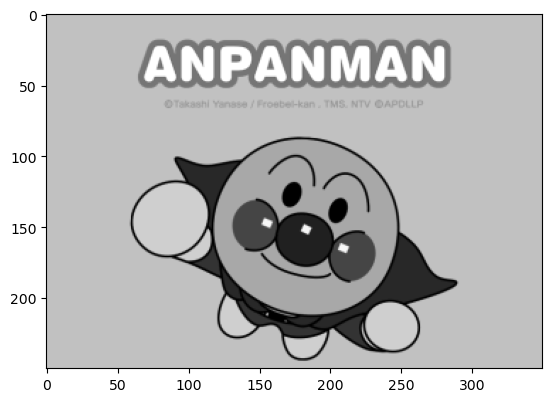

In [129]:

threshold = 3.0

image = cv2.imread('testdata/1.png', 0).astype(np.float64)
plt.imshow(image , cmap='gray')

In [130]:
sigmas = 2**(1/4)
num_octaves = 2
num_DoG_images_per_octave = 4
num_guassian_images_per_octave = num_DoG_images_per_octave + 1

octives:  0
num_guassian_images_per_octave:  5
octives:  1
num_guassian_images_per_octave:  5


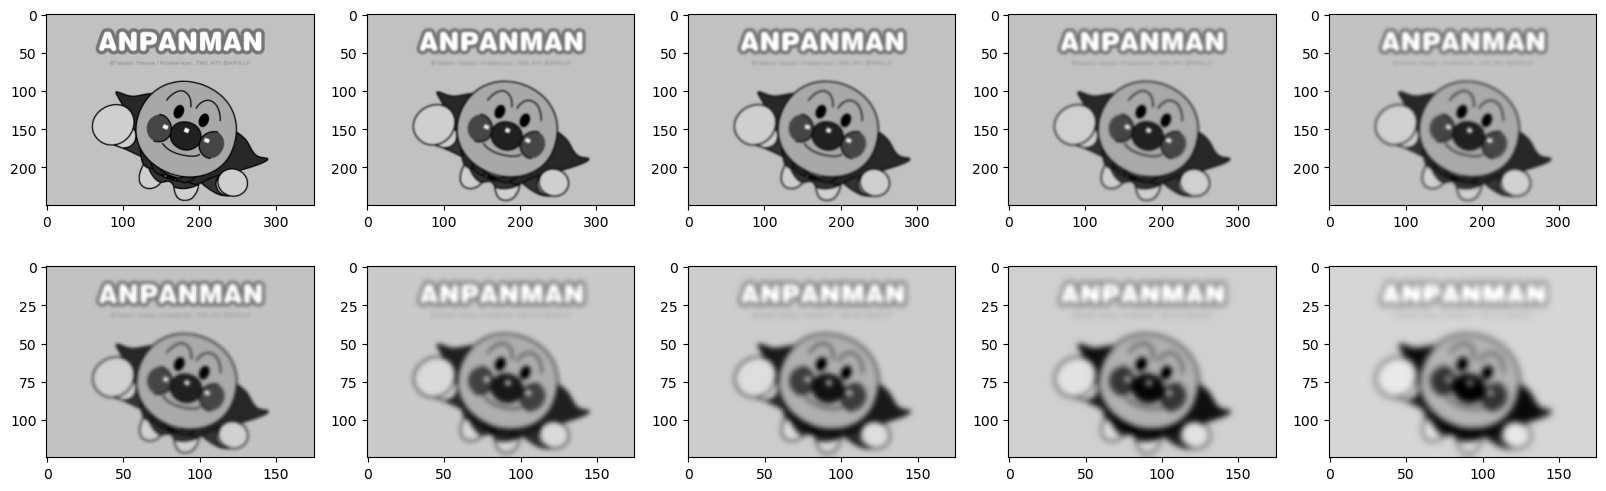

In [131]:
# Step 1: Filter images with different sigma values (5 images per octave, 2 octave in total)
# - Function: cv2.GaussianBlur (kernel = (0, 0), sigma = self.sigma**___)
sigmaValues = [sigmas**i for i in range(1,num_DoG_images_per_octave+1)]
gaussian_images = []
imageForGaussion = image.copy()

fig = plt.figure(figsize=(20, 6))
figIndex = 1
for octives in range(num_octaves):
    print("octives: ", octives)
    print("num_guassian_images_per_octave: ", num_guassian_images_per_octave)
    gaussian_images.append([imageForGaussion])
    gaussian_images[-1].extend(cv2.GaussianBlur(imageForGaussion, (0,0), sigma) for sigma in sigmaValues)
    for(i) in range(0, num_guassian_images_per_octave):
        fig.add_subplot(2,5, figIndex)
        figIndex += 1
        plt.imshow(gaussian_images[-1][i], cmap='gray')
    imageForGaussion = cv2.resize(gaussian_images[-1][-1], (0, 0), fx=0.5, fy=0.5 , interpolation=cv2.INTER_NEAREST) 

octives:  0
num_DoG_images_per_octave:  4
octives:  1
num_DoG_images_per_octave:  4


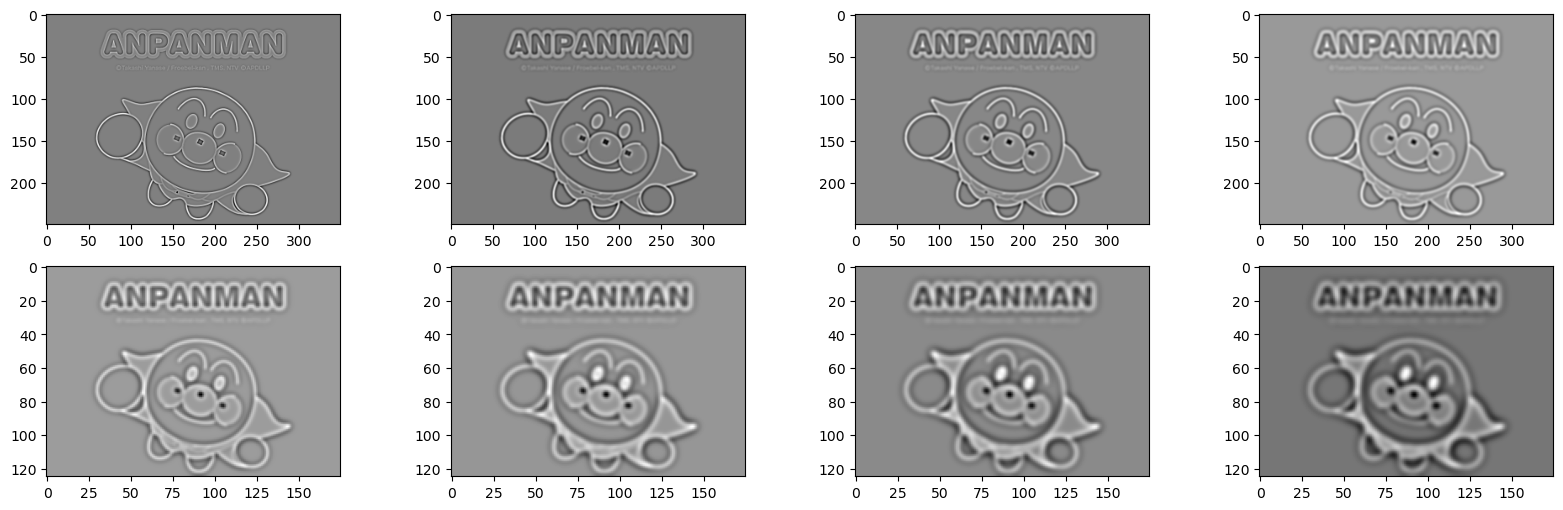

In [132]:
# Step 2: Subtract 2 neighbor images to get DoG images (4 images per octave, 2 octave in total)
# - Function: cv2.subtract(second_image, first_image)
dog_images = []
fig = plt.figure(figsize=(20, 6))
figIndex = 1
for octives in range(num_octaves):
    print("octives: ", octives)
    print("num_DoG_images_per_octave: ", num_DoG_images_per_octave)
    dog_images.append([cv2.subtract(gaussian_images[octives][i+1], gaussian_images[octives][i]) for i in range(len(gaussian_images[octives])-1)])
    for(i) in range(0, num_DoG_images_per_octave):
        fig.add_subplot(2,4, figIndex)
        figIndex += 1
        plt.imshow(dog_images[-1][i], cmap='gray')


In [133]:
# Step 3: Thresholding the value and Find local extremum (local maximun and local minimum)
#         Keep local extremum as a keypoint
keypoints = []
scale = 1
for octives in range(num_octaves):
    octiveKeyPoints = []
    octivesDogImageArray = np.array(dog_images[octives])
    for dogIndex in range(1,octivesDogImageArray.shape[0]-1):
        currentDogImage = octivesDogImageArray[dogIndex]
        overThreshold = np.argwhere(abs(currentDogImage) > threshold)
        for(x,y) in overThreshold:
            if dogIndex == 0 or dogIndex == octivesDogImageArray.shape[0]-1:
                continue
            if (currentDogImage[x,y] == np.max(octivesDogImageArray[dogIndex-1:dogIndex+2, x-1:x+2, y-1:y+2]) or currentDogImage[x,y] == np.min(octivesDogImageArray[dogIndex-1:dogIndex+2, x-1:x+2, y-1:y+2])):
                octiveKeyPoints.append((x * scale,y * scale))
    scale *= 2
    keypoints.extend(octiveKeyPoints)

In [138]:
# Step 4: Delete duplicate keypoints
# - Function: np.unique
keypoints = np.unique(keypoints, axis=0)
# sort 2d-point by y, then by x
keypoints = keypoints[np.lexsort((keypoints[:,1],keypoints[:,0]))] 
print("keypoints size: {}".format(keypoints.shape))

keypoints size: (162, 2)


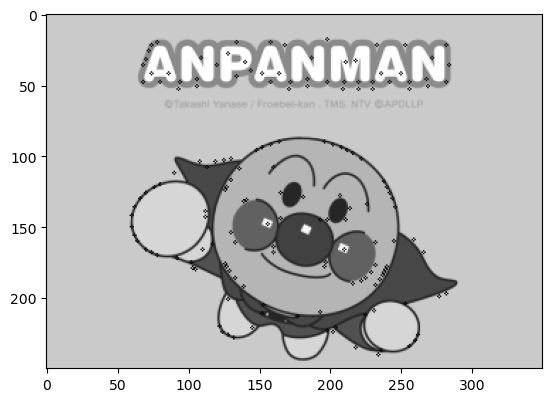

In [139]:
# Step 5: Draw keypoints on the original image using red circles
for (x, y) in keypoints:
    cv2.circle(image, (y, x), 1, (0, 0, 255), 1)
plt.imshow(image, cmap='gray')



keypoints size: (162, 2)
